# PyTorch를 이용한 Linear Regression

    * y = 1 + 2 * x1 + 3 * x2 변수 2개의 Linear 모델
    * 약간의 오차가 들어간 100개의 데이터를 생성
    * 위의 linear 모델을 approximation 하기

## Hyper Parameters
## Problem Statements
## Training
## Loss

In [1]:
import torch

In [2]:
# Hyper Parameters
TOTAL_EPOCH = 500
LR = 0.005

In [3]:
print(torch.cuda.is_available())

True


In [4]:
# GPU
device = torch.device("cuda:0")

In [5]:
# Problem Statements
# y = 1 + 2 * x1 + 3 * x2
w_true = torch.Tensor([1, 2, 3]) # coefficient 1,2,3
X = torch.cat([torch.ones(100,1), torch.randn(100,2)], dim=1) # [100,3] 1, x1, x2
y = torch.mv(X, w_true) + torch.rand(100) * 0.3 # [100] 'y = 1 + 2 * x1 + 3 * x2 + residual error'
w = torch.rand(3, requires_grad=True) # [3]

In [6]:
loss_lst = []
for epoch in range(TOTAL_EPOCH):
    w.grad = None
    y_pred = torch.mv(X, w) # [100]
    loss = torch.mean((y - y_pred) ** 2) # Loss Function: MSE
    loss.backward()
    w.data = w.data - LR * w.grad.data
    loss_lst.append(loss.item())

In [7]:
for i in range(len(loss_lst)):
    if (i+1) % 10 == 0:
        print(loss_lst[i])

5.6081438064575195
4.573292255401611
3.7366678714752197
3.0589542388916016
2.508882522583008
2.061539649963379
1.6970385313034058
1.399476170539856
1.1561087369918823
0.9567068219184875
0.7930404543876648
0.6584776043891907
0.5476613640785217
0.45625704526901245
0.38075026869773865
0.3182857036590576
0.2665395736694336
0.22361606359481812
0.1879664957523346
0.15832361578941345
0.13364779949188232
0.11308520287275314
0.09593326598405838
0.08161300420761108
0.06964672356843948
0.05963917821645737
0.051263246685266495
0.04424813762307167
0.03836887329816818
0.03343842923641205
0.029301345348358154
0.02582809515297413
0.022910691797733307
0.020459212362766266
0.01839820109307766
0.016664870083332062
0.01520657166838646
0.013979213312268257
0.012945946305990219
0.012075806967914104
0.01134282723069191
0.010725278407335281
0.010204869322478771
0.00976616982370615
0.009396322071552277
0.009084425866603851
0.00882136169821024
0.008599475026130676
0.008412299677729607
0.008254354819655418


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

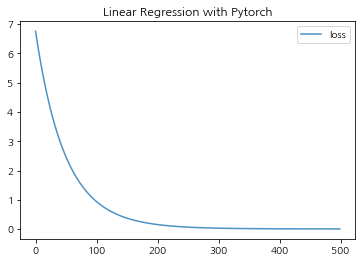

In [9]:
plt.clf()
plt.title("Linear Regression with Pytorch")
plt.plot(loss_lst, '-', label='loss', alpha=0.8)
plt.legend(loc='best')
plt.show()

In [10]:
print(w)
print("accuracy: 1= {:0.6f}, 2= {:0.6f}, 3= {:0.6f}".
      format( 1 - (abs(w[0] - 1) / 1), 
              1 - (abs(w[1] - 2) / 2), 
              1 - (abs(w[2] - 3) / 3) ))

tensor([1.1668, 1.9693, 2.9833], requires_grad=True)
accuracy: 1= 0.833214, 2= 0.984640, 3= 0.994418


In [11]:
print(w)
print("accuracy: 1= {:0.2f}%, 2= {:0.2f}%, 3= {:0.2f}%".
      format( 100 - ((abs(w[0] - 1) / 1) * 100), 
              100 - ((abs(w[1] - 2) / 2) * 100), 
              100 - ((abs(w[2] - 3) / 3) * 100) ))

tensor([1.1668, 1.9693, 2.9833], requires_grad=True)
accuracy: 1= 83.32%, 2= 98.46%, 3= 99.44%
